<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applewatch data 불러오기

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/KDT_python/project/Hackathon/Sleep Analysis Data (1).csv')

In [15]:
data.shape

(2955, 5)

In [16]:
data.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch


In [17]:
data.tail()

,Start,End,Duration (hr),Value,Source
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch
2953,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,Core,Sujeong의 Apple Watch
2954,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,InBed,Sujeong의 Apple Watch


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          2955 non-null   object 
 1   End            2955 non-null   object 
 2   Duration (hr)  2955 non-null   float64
 3   Value          2955 non-null   object 
 4   Source         2955 non-null   object 
dtypes: float64(1), object(4)
memory usage: 115.6+ KB


In [31]:
# 데이터 저장.
sleep = data

# EDA

- "data"는 2023.02.13 저녁부터 2023.05.03까지의 수면시간 데이터가 저장되어 있음.

- Start
- End
- Duration (hr)
- Value : 수면 깊이. deep, core, rem, awake
- Source : nhc(휴대폰), Sujeong의 Apple watch(워치)

- ['Source' == 'nhc'] 의 'Value'가 'InBed'인 경우는 한 번 수면한 총 시간 정보를 가지고 있으므로 따로 저장하여 도탈 시간과 비교하여 데이터가 정교한지(?)를 확인.
- ['Source' == 'Sujeong의 Apple watch'] 의 'Value'가 'InBed'인 경우는 이상치로 구분하여 drop 하기로 결정.

- 분석 구간 (2/17, 2/25, 3/20, 3/26, 4/22 에 워치를 착용하지 않고 수면함. 이상치 -> 제거 결정, 규칙적인 수면이 시작되는 2/26일부터 분석 시작)
  - first - 2/26-3/25 (2/26-3/20, 3/22-3/25)
  - second- 3/27~4/21
  - third - 4/23~5/3 

- deep: 1, core:2, rem:3, awake:4

In [46]:
# total 수면 시간 비교를 위한 "nhc" 데이터셋 생성
InBed = data[data["Value"]=='InBed']
nhc = InBed[InBed["Source"] == 'NHC']

# 워치 데이터에서 InBed를 제외한 데이터인 "watch" 데이터셋 생성.
watch = data[data["Source"] != 'NHC']
watch = watch[watch['Value'] != "InBed"]

In [32]:
nhc.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.44,InBed,NHC
36,2023-02-14 23:16:52,2023-02-15 09:00:24,9.73,InBed,NHC
93,2023-02-15 23:50:07,2023-02-16 06:36:44,6.78,InBed,NHC
138,2023-02-16 06:36:50,2023-02-16 09:00:17,2.39,InBed,NHC
160,2023-02-17 00:40:33,2023-02-17 09:00:08,8.33,InBed,NHC


In [33]:
watch.head()

,Start,End,Duration (hr),Value,Source
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch
5,2023-02-14 00:38:25,2023-02-14 00:39:55,0.025,Core,Sujeong의 Apple Watch


In [47]:
# "Source" 열의 데이터를 레이블링 해줌.
# deep: 1, core:2, rem:3, awake:4
watch['Value']= watch['Value'].replace('Deep',1)
watch['Value']= watch['Value'].replace('Core',2)
watch['Value']= watch['Value'].replace('REM',3)
watch['Value']= watch['Value'].replace('Awake',4)

In [48]:
watch.head()

,Start,End,Duration (hr),Value,Source
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,2,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,1,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,2,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,1,Sujeong의 Apple Watch
5,2023-02-14 00:38:25,2023-02-14 00:39:55,0.025,2,Sujeong의 Apple Watch


In [49]:
# Series to datetime
# 데이터 타입을 datetime으로 변경. 날짜와 시간 추출이 가능하도록 함.
watch['Start'] = pd.to_datetime(watch['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
watch['End'] = pd.to_datetime(watch['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [50]:
watch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 1 to 2953
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          2267 non-null   datetime64[ns]
 1   End            2267 non-null   datetime64[ns]
 2   Duration (hr)  2267 non-null   float64       
 3   Value          2267 non-null   int64         
 4   Source         2267 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 106.3+ KB


- 예를 들어, 2월 26일 수면 시간을 보고싶다고 했을 때 2월 25일 11시에 수면을 시작했다면 해당 정보가 누락될 위험이 있으므로 항상 날짜를 가져올 때는(2/26 - 3/20) 구간의 시작 전날 12:00:00 부터(2023-02-25 12:00:00) 구간의 마지막날 12:00:00 까지(2023-03-20 12:00:00) 가져와야 함을 주의.

In [ ]:
# # 하나의 datetime에 대한 정보 추출은 다음과 같이 할 수 있음
# watch.iloc[0,0].year
# watch.iloc[0,0].month
# watch.iloc[0,0].day

# # 전체 dt에 대한 datetime 정보를 추출하려면,
# watch['Start'].dt.date
# watch['day'] = watch['Start'].dt.day 
# watch['month'] =watch['Start'].dt.month
# watch['year'] = watch['Start'].dt.year

In [66]:
# first - 2/26-3/25 (2/26-3/20, 3/22-3/25)
start_date = '2023-02-25 12:00:00'
end_date = '2023-03-20 12:00:00'
first = watch[(watch['Start']>=start_date) & (watch['Start']<=end_date)]

In [67]:
first

,Start,End,Duration (hr),Value,Source
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch
501,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch
...,...,...,...,...,...
1405,2023-03-20 03:42:35,2023-03-20 04:52:05,1.160,2,Sujeong의 Apple Watch
1406,2023-03-20 04:52:05,2023-03-20 05:31:05,0.650,3,Sujeong의 Apple Watch
1407,2023-03-20 05:31:05,2023-03-20 06:46:35,1.260,2,Sujeong의 Apple Watch
1408,2023-03-20 06:46:35,2023-03-20 07:23:35,0.617,3,Sujeong의 Apple Watch


In [60]:
# date와 time 열 추가
first['date'] = first['Start'].dt.date
first['time'] = first['Start'].dt.time

first.head()

<ipython-input-60-77b4cdd3e540>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['date'] = first['Start'].dt.date
<ipython-input-60-77b4cdd3e540>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['time'] = first['Start'].dt.time


,Start,End,Duration (hr),Value,Source,date,time
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,00:00:40
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,00:03:40
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,00:09:40
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,00:13:10
501,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,00:14:40


In [61]:
# 24:00로 되어 있는 값은 python datetime에서는 읽히지 않으므로 00:00으로 변경
first['time'].replace('24:00:00','00:00:00', inplace=True)

first['time'] = pd.to_datetime(first['time'], format='%H:%M:%S', errors='raise').dt.time

first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 495 to 1409
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          697 non-null    datetime64[ns]
 1   End            697 non-null    datetime64[ns]
 2   Duration (hr)  697 non-null    float64       
 3   Value          697 non-null    int64         
 4   Source         697 non-null    object        
 5   date           697 non-null    object        
 6   time           697 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 43.6+ KB


<ipython-input-61-ee360be50a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['time'].replace('24:00:00','00:00:00', inplace=True)
<ipython-input-61-ee360be50a14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['time'] = pd.to_datetime(first['time'], format='%H:%M:%S', errors='raise').dt.time


In [62]:
first.head()

,Start,End,Duration (hr),Value,Source,date,time
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,00:00:40
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,00:03:40
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,00:09:40
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,00:13:10
501,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,00:14:40


In [64]:
start_date = '2023-02-27 12:00:00'
end_date = '2023-02-28 12:00:00'
test = watch[(watch['Start']>=start_date) & (watch['Start']<=end_date)]

In [65]:
# 2/27일 저녁 -> 2/28일 수면 데이터
test

,Start,End,Duration (hr),Value,Source
575,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch
577,2023-02-28 00:22:49,2023-02-28 00:59:19,0.608,1,Sujeong의 Apple Watch
578,2023-02-28 00:59:19,2023-02-28 01:06:19,0.117,2,Sujeong의 Apple Watch
579,2023-02-28 01:06:19,2023-02-28 01:21:19,0.250,3,Sujeong의 Apple Watch
580,2023-02-28 01:21:19,2023-02-28 02:04:19,0.717,2,Sujeong의 Apple Watch
581,2023-02-28 02:04:19,2023-02-28 02:24:19,0.333,1,Sujeong의 Apple Watch
582,2023-02-28 02:24:19,2023-02-28 03:30:19,1.100,2,Sujeong의 Apple Watch
583,2023-02-28 03:30:19,2023-02-28 03:54:49,0.408,3,Sujeong의 Apple Watch
584,2023-02-28 03:54:49,2023-02-28 03:57:49,0.050,2,Sujeong의 Apple Watch
585,2023-02-28 03:57:49,2023-02-28 04:05:19,0.125,3,Sujeong의 Apple Watch


In [69]:
test['year'] = test['Start'].dt.year
test['month'] =test['Start'].dt.month
test['day'] = test['Start'].dt.day 

test

<ipython-input-69-e50dc3f98b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['year'] = test['Start'].dt.year
<ipython-input-69-e50dc3f98b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] =test['Start'].dt.month
<ipython-input-69-e50dc3f98b70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,Start,End,Duration (hr),Value,Source,year,month,day
575,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023,2,27
577,2023-02-28 00:22:49,2023-02-28 00:59:19,0.608,1,Sujeong의 Apple Watch,2023,2,28
578,2023-02-28 00:59:19,2023-02-28 01:06:19,0.117,2,Sujeong의 Apple Watch,2023,2,28
579,2023-02-28 01:06:19,2023-02-28 01:21:19,0.250,3,Sujeong의 Apple Watch,2023,2,28
580,2023-02-28 01:21:19,2023-02-28 02:04:19,0.717,2,Sujeong의 Apple Watch,2023,2,28
581,2023-02-28 02:04:19,2023-02-28 02:24:19,0.333,1,Sujeong의 Apple Watch,2023,2,28
582,2023-02-28 02:24:19,2023-02-28 03:30:19,1.100,2,Sujeong의 Apple Watch,2023,2,28
583,2023-02-28 03:30:19,2023-02-28 03:54:49,0.408,3,Sujeong의 Apple Watch,2023,2,28
584,2023-02-28 03:54:49,2023-02-28 03:57:49,0.050,2,Sujeong의 Apple Watch,2023,2,28
585,2023-02-28 03:57:49,2023-02-28 04:05:19,0.125,3,Sujeong의 Apple Watch,2023,2,28


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 575 to 604
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          26 non-null     datetime64[ns]
 1   End            26 non-null     datetime64[ns]
 2   Duration (hr)  26 non-null     float64       
 3   Value          26 non-null     int64         
 4   Source         26 non-null     object        
 5   year           26 non-null     int64         
 6   month          26 non-null     int64         
 7   day            26 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 1.8+ KB


In [71]:
test['hour'] = test['Start'].dt.hour

test

<ipython-input-71-4d4108c6fa08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hour'] = test['Start'].dt.hour


,Start,End,Duration (hr),Value,Source,year,month,day,hour
575,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023,2,27,23
577,2023-02-28 00:22:49,2023-02-28 00:59:19,0.608,1,Sujeong의 Apple Watch,2023,2,28,0
578,2023-02-28 00:59:19,2023-02-28 01:06:19,0.117,2,Sujeong의 Apple Watch,2023,2,28,0
579,2023-02-28 01:06:19,2023-02-28 01:21:19,0.250,3,Sujeong의 Apple Watch,2023,2,28,1
580,2023-02-28 01:21:19,2023-02-28 02:04:19,0.717,2,Sujeong의 Apple Watch,2023,2,28,1
581,2023-02-28 02:04:19,2023-02-28 02:24:19,0.333,1,Sujeong의 Apple Watch,2023,2,28,2
582,2023-02-28 02:24:19,2023-02-28 03:30:19,1.100,2,Sujeong의 Apple Watch,2023,2,28,2
583,2023-02-28 03:30:19,2023-02-28 03:54:49,0.408,3,Sujeong의 Apple Watch,2023,2,28,3
584,2023-02-28 03:54:49,2023-02-28 03:57:49,0.050,2,Sujeong의 Apple Watch,2023,2,28,3
585,2023-02-28 03:57:49,2023-02-28 04:05:19,0.125,3,Sujeong의 Apple Watch,2023,2,28,3


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 575 to 604
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          26 non-null     datetime64[ns]
 1   End            26 non-null     datetime64[ns]
 2   Duration (hr)  26 non-null     float64       
 3   Value          26 non-null     int64         
 4   Source         26 non-null     object        
 5   year           26 non-null     int64         
 6   month          26 non-null     int64         
 7   day            26 non-null     int64         
 8   hour           26 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 2.0+ KB


In [75]:
for i in range(len(test)):
  if (test.iloc[i,8] >= 12):
    test.iloc[i,7] += 1

test

,Start,End,Duration (hr),Value,Source,year,month,day,hour
575,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023,2,28,23
577,2023-02-28 00:22:49,2023-02-28 00:59:19,0.608,1,Sujeong의 Apple Watch,2023,2,28,0
578,2023-02-28 00:59:19,2023-02-28 01:06:19,0.117,2,Sujeong의 Apple Watch,2023,2,28,0
579,2023-02-28 01:06:19,2023-02-28 01:21:19,0.250,3,Sujeong의 Apple Watch,2023,2,28,1
580,2023-02-28 01:21:19,2023-02-28 02:04:19,0.717,2,Sujeong의 Apple Watch,2023,2,28,1
581,2023-02-28 02:04:19,2023-02-28 02:24:19,0.333,1,Sujeong의 Apple Watch,2023,2,28,2
582,2023-02-28 02:24:19,2023-02-28 03:30:19,1.100,2,Sujeong의 Apple Watch,2023,2,28,2
583,2023-02-28 03:30:19,2023-02-28 03:54:49,0.408,3,Sujeong의 Apple Watch,2023,2,28,3
584,2023-02-28 03:54:49,2023-02-28 03:57:49,0.050,2,Sujeong의 Apple Watch,2023,2,28,3
585,2023-02-28 03:57:49,2023-02-28 04:05:19,0.125,3,Sujeong의 Apple Watch,2023,2,28,3


<Axes: xlabel='Start', ylabel='Value'>

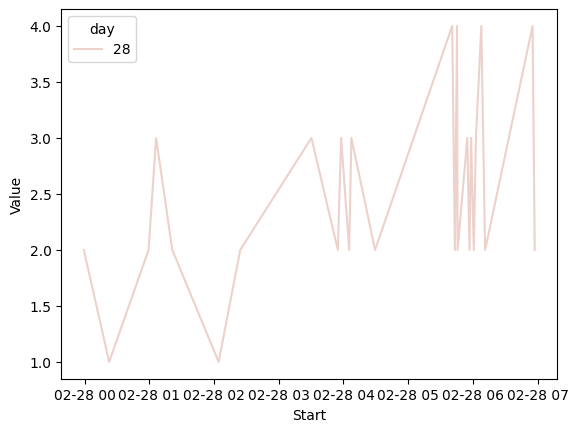

In [76]:
import seaborn as sns
sns.lineplot(data=test,x='Start',y='Value', hue='day')

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])